# Version 1 is just create a long text file - jump to version two for spliting into different files and version 3 for just replacing hard words in the canonical order

In [1]:
#parsing of Matthew in order to make a proof of concept for a graded level reader in this book
import pandas as pd
import numpy as np
from re import search 

In [2]:
#Get data set into the python
mattToJohn = pd.read_excel('MattToJohn.xlsx')
gospels = np.array(mattToJohn)

In [3]:
#not useful as misses out a few greek words
#mounceWordFrequency = pd.read_excel('MounceFrequencyGreek.xlsx')
#freq = np.array(mounceWordFrequency)
actsToRev = pd.read_excel('ActsToRev.xlsx')
remainingNT = np.array(actsToRev)

In [4]:
headers = ["41_Mat", "42_Mrk", "43_Luk", "44_Jhn"]

verses = []
for head in headers:
    for row in gospels:
        if (search(head, str(row[0]))):
            verses.append((row[0].strip(), row[2].strip(),row[6].strip(), row[3]))
            #verses.append((row[0].strip(), row[2].strip(),row[6].strip()))

print(verses[1])
#print(verses)

('41_Mat.001.001', 'γενέσεως', 'γένεσις', 'of [the] genealogy')


In [5]:
Headers = []
for x in range(45,68):

    for row in remainingNT:
        if (search(str(x) + "_", str(row[0]))):
            Headers.append(row[0][:6])
            #print(row)
            break
            
print(Headers)

for Head in Headers:
    for row in remainingNT:
        if (search(Head, str(row[0]))):
            verses.append((row[0].strip(), row[2].strip(),row[6].strip(), row[3]))
#print(verses)
#https://stackoverflow.com/questions/43288550/iopub-data-rate-exceeded-in-jupyter-notebook-when-viewing-image <-- must run this to prevent error
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10 <-- in anaconda prompt

['45_Act', '46_Rom', '47_1Co', '48_2Co', '49_Gal', '50_Eph', '51_Php', '52_Col', '53_1Th', '54_2Th', '55_1Ti', '56_2Ti', '57_Tit', '58_Phm', '59_Heb', '60_Jas', '61_1Pe', '62_2Pe', '63_1Jn', '64_2Jn', '65_3Jn', '66_Jud', '67_Rev']


In [6]:
#Extract the frequency list for the whole NT
    
freq = {}
for row in verses :
    if (row[2] in freq):
        freq[row[2]] += 1
    else:
        freq[row[2]] = 1

retain_freq = freq.copy()
        
freq = sorted(freq.items(), key=lambda x: x[1], reverse = True) 
for row in freq[0:10]:
    print(row)

('ὁ', 20753)
('καί', 9404)
('αὐτός', 5873)
('σύ', 3002)
('δέ', 2908)
('ἐν', 2841)
('ἐγώ', 2697)
('εἰμί', 2541)
('εἰς', 1803)
('οὐ', 1642)


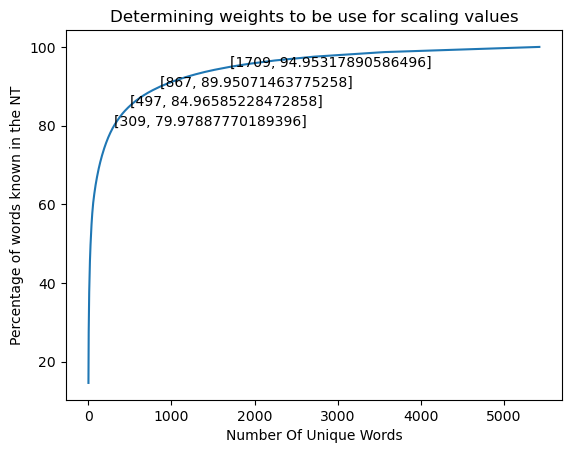

In [7]:
import matplotlib.pyplot as plt
import math
# generate the curve
x_axis = [1]
y_axis = [20753]
for index in range(1,len(freq)):
    x_axis.append(index + 1)
    y_axis.append(freq[index][1] + y_axis[index-1])
    
scaled_y = [(x/y_axis[-1]*100) for x in y_axis]

#
def printPoint(percentage):
    point = []
    for index in range(len(scaled_y)):
        if(round(scaled_y[index],1) == percentage):
            point.append(x_axis[index])
            point.append(scaled_y[index])
            return point
plt.plot(x_axis,scaled_y)
plt.title("Determining weights to be use for scaling values")
plt.xlabel("Number Of Unique Words")
plt.ylabel("Percentage of words known in the NT")
plt.annotate(str(printPoint(80.0)), printPoint(80.0))
plt.annotate(str(printPoint(85.0)), printPoint(85.0))
plt.annotate(str(printPoint(90.0)), printPoint(90.0))
plt.annotate(str(printPoint(95.0)), printPoint(95.0))
plt.show()

# You may jump to version 2

In [11]:
#Experimenting with a ratio as weights
print(y_axis[-1])
for row in freq:
    print(row[1]/y_axis[-1])

142030
0.14611701753150744
0.06621136379638104
0.041350418925579106
0.021136379638104625
0.020474547630782228
0.020002816306414137
0.018988945997324508
0.017890586495810743
0.012694501161726397
0.011560937830035908
0.0101246215588256
0.01003309160036612
0.009561360275998028
0.009476871083573892
0.009378300359079068
0.008934732098852356
0.007639231148348941
0.007463211997465324
0.007399845103147222
0.006977399141026543
0.006604238541153278
0.006407097092163627
0.005322819122720552
0.00516792226994297
0.005041188481306766
0.004829965500246427
0.004808843202140393
0.00477363937196367
0.004724354009716257
0.004703231711610223
0.004548334858832641
0.004541294092797296
0.00407660353446455
0.00406252200239386
0.0040061958741111035
0.003942828979793002
0.0038231359571921425
0.0037949728930507637
0.003654157572343871
0.003647116806308526
0.0034077307611068085
0.003358445398859396
0.00307681475744561
0.0029712032669154402
0.002935999436738717
0.002759980285855101
0.002717735689643033
0.002689572

In [10]:
rank = []
sum = 0
noWord = 1
for index in range(1,len(verses)):
    noWord = noWord + 1
    if(verses[index][0] != verses[index - 1][0]): #Start of every verse
        #print("The sum is: " + str(sum))
        #print(noWord)
        #print(sum//noWord)
        #print(verses[index])
        rank.append([verses[index], sum/noWord])
        sum = 0
        noWord= 1
        continue
    for index2 in range(len(freq)): #find the occurence from the dictionary and add
        if(verses[index-1][2] == freq[index2][0]):
            if(x_axis[index2]<printPoint(80.0)[0]):
                sum = sum + freq[index2][1] 
                continue
            elif(printPoint(80.0)[0]<x_axis[index2]<printPoint(85.0)[0]):
                sum = sum + freq[index2][1] - 99999
                continue
            elif(printPoint(85.0)[0]<x_axis[index2]<printPoint(90.0)[0]):
                sum = sum + freq[index2][1] - 999999999
                continue
            else:
                sum = sum + freq[index2][1] - 999999999999999
                continue

#print(rank)   
#rank = rank + [] # missed out first verse of Matthew

In [11]:
#random.sort(key=takeSecond)
def sortSecond(val):
    return val[1] 
rank.sort(key=sortSecond, reverse = True)
for x in rank:
    print (x)

[('63_1Jn.005.013', 'Ταῦτα', 'οὗτος', 'These things'), 8026.473684210527]
[('63_1Jn.005.009', 'εἰ', 'εἰ', 'If'), 7977.958333333333]
[('42_Mrk.001.015', 'καὶ', 'καί', 'and'), 7720.047619047619]
[('45_Act.028.025', 'ἀσύμφωνοι', 'ἀσύμφωνος', 'Discordant'), 7618.0]
[('67_Rev.018.001', 'Καὶ', 'καί', 'and'), 7426.684210526316]
[('51_Php.002.022', 'τὴν', 'ὁ', '<the>'), 7370.75]
[('44_Jhn.003.014', 'καὶ', 'καί', 'And'), 7229.521739130435]
[('47_1Co.002.012', 'ἡμεῖς', 'ἐγώ', 'We'), 7161.466666666666]
[('44_Jhn.002.003', 'καὶ', 'καί', 'And'), 7158.461538461538]
[('41_Mat.007.022', 'πολλοὶ', 'πολύς', 'Many'), 7084.307692307692]
[('44_Jhn.006.034', 'εἶπον', 'ἔπω, ἐρῶ, εἶπον', 'They said'), 7064.35294117647]
[('43_Luk.019.048', 'καὶ', 'καί', 'And'), 7021.125]
[('42_Mrk.004.015', 'οὗτοι', 'οὗτος', 'These'), 6981.666666666667]
[('42_Mrk.006.025', 'καὶ', 'καί', 'And'), 6956.055555555556]
[('41_Mat.012.009', 'Καὶ', 'καί', 'And'), 6954.090909090909]
[('45_Act.016.033', 'καὶ', 'καί', 'And'), 6934.0666666

[('45_Act.005.030', 'ὁ', 'ὁ', 'The'), -66666666662847.93]
[('42_Mrk.014.035', 'καὶ', 'καί', 'And'), -66666666663160.53]
[('43_Luk.007.050', 'εἶπεν', 'ἔπω, ἐρῶ, εἶπον', 'He said'), -66666666663311.2]
[('43_Luk.013.027', 'καὶ', 'καί', 'And'), -66666666663334.336]
[('42_Mrk.008.023', 'καὶ', 'καί', 'And'), -66666666663387.664]
[('56_2Ti.001.008', 'Μὴ', 'μή', 'Not'), -66666666663465.47]
[('45_Act.015.012', 'ἐσίγησεν', 'σιγάω', 'Kept silent'), -66666666663492.734]
[('50_Eph.004.005', 'εἷς', 'εἷς', 'one'), -66666666663706.266]
[('43_Luk.005.024', 'ἵνα', 'ἵνα', 'That'), -66666666663852.6]
[('41_Mat.009.006', 'ἵνα', 'ἵνα', 'So that'), -66666666663980.4]
[('43_Luk.011.010', 'πᾶς', 'πᾶς', 'Everyone'), -66666666664231.266]
[('44_Jhn.015.005', 'ἐγώ', 'ἐγώ', 'I'), -66666666664301.63]
[('45_Act.024.019', 'τινὲς', 'τις', 'Some'), -66666666664417.0]
[('67_Rev.011.019', 'Καὶ', 'καί', 'And'), -66666666664942.914]
[('67_Rev.011.012', 'καὶ', 'καί', 'And'), -66666666665280.2]
[('42_Mrk.009.048', 'ὅπου', 'ὅπ

[('42_Mrk.011.020', 'καὶ', 'καί', 'And'), -111111111118770.78]
[('41_Mat.005.010', 'Μακάριοι', 'μακάριος', 'Blessed [are]'), -111111111118917.89]
[('47_1Co.010.023', 'Πάντα', 'πᾶς', 'All things'), -111111111119017.44]
[('46_Rom.003.019', 'οἴδαμεν', 'εἴδω', 'We know'), -111111111119284.78]
[('45_Act.010.028', 'ἔφη', 'φημί', 'He was saying'), -111111111119434.67]
[('49_Gal.003.026', 'πάντες', 'πᾶς', 'all'), -111111111119463.22]
[('43_Luk.001.005', 'Ἐγένετο', 'γίνομαι', 'There was'), -111111111119601.78]
[('67_Rev.016.021', 'καὶ', 'καί', 'And'), -111111111119797.22]
[('43_Luk.014.003', 'Καὶ', 'καί', 'And'), -111111111120743.89]
[('43_Luk.018.039', 'Καὶ', 'καί', 'And'), -111111111120862.22]
[('44_Jhn.012.034', 'Ἀπεκρίθη', 'ἀποκρίνω', 'Answered'), -111111111121559.67]
[('47_1Co.013.008', 'ἡ', 'ὁ', '<the>'), -111111111121626.89]
[('45_Act.002.025', 'Δαυὶδ', 'Δαυείδ, Δαυίδ, Δαβίδ', 'David'), -111111111123572.56]
[('55_1Ti.003.014', 'Ταῦτά', 'οὗτος', 'These things'), -111111111124476.56]
[('59

[('46_Rom.008.024', 'τῇ', 'ὁ', 'In this'), -199999999994958.7]
[('50_Eph.003.015', 'ἐξ', 'ἐκ', 'from'), -199999999995199.4]
[('51_Php.003.012', 'οὐχ', 'οὐ', 'Not'), -199999999995509.8]
[('59_Heb.005.011', 'περὶ', 'περί', 'Concerning'), -199999999995630.1]
[('49_Gal.004.006', 'ὅτι', 'ὅτι', 'Because'), -199999999995671.6]
[('43_Luk.011.054', 'ἐνεδρεύοντες', 'ἐνεδρεύω', 'watching'), -199999999995953.9]
[('45_Act.009.026', 'Παραγενόμενος', 'παραγίνομαι', 'Having arrived'), -199999999995979.28]
[('45_Act.013.019', 'καὶ', 'καί', 'and'), -199999999996055.1]
[('60_Jas.005.006', 'κατεδικάσατε,', 'καταδικάζω', 'You have condemned'), -199999999996066.34]
[('59_Heb.007.005', 'καὶ', 'καί', 'And'), -199999999996121.34]
[('41_Mat.015.017', 'οὐ', 'οὐ', 'Not '), -199999999996188.3]
[('42_Mrk.010.017', 'Καὶ', 'καί', 'And'), -199999999996277.5]
[('45_Act.012.023', 'παραχρῆμα', 'παραχρῆμα', 'Immediately'), -199999999996379.6]
[('48_2Co.004.017', 'τὸ', 'ὁ', 'The'), -199999999996487.16]
[('45_Act.024.010',

In [12]:
allVerses = []
verse = ""
label = ""
englishVerse= ""
for index in range(len(verses)-1): #
    verse = verse + " " + str(verses[index][1])
    englishVerse = englishVerse + " " + str(verses[index][3])
    if(verses[index][0] != verses[index + 1][0]): #if subsequent row is another verse
        allVerses.append((verses[index][0], verse, englishVerse))
        verse = ""
        englishVerse = ""
        
print(allVerses[0])

('41_Mat.001.001', ' Βίβλος γενέσεως Ἰησοῦ Χριστοῦ υἱοῦ Δαυὶδ υἱοῦ Ἀβραάμ.', ' [The] book of [the] genealogy of Jesus Christ, son of David, son of Abraham:')


In [48]:
gradedReader = ""
for index in range(len(rank)):
    gradedReader = gradedReader + str((index + 1)) +". " + str(rank[index]) + "\nGreek Text:\n"
    print(gradedReader)
    break
    for findVerse in allVerses:
        if(rank[index][0][0] == findVerse[0]):
            gradedReader = gradedReader + str(findVerse[1]) + "\n\nEnglish Translation:\n"
            gradedReader = gradedReader + str(findVerse[2]) + "\n\n"
            continue

1. [('63_1Jn.005.013', 'Ταῦτα', 'οὗτος', 'These things'), 8026.473684210527]
Greek Text:



In [126]:
#Create a text file
f = open("NewTestamentGradedReaderForVerses.txt","w+",encoding='utf-8')
f.write(str(gradedReader))
f.close()
#df = pd.DataFrame(gradedReader)
#df.to_excel('NewTestamentGradedReaderForVerses.xlsx', sheet_name='sheet1', index=False)

In [127]:
print(gradedReader.count("\n")) #looks correct as the new testament has almost 8k verses

55738


In [52]:
print(gradedReader)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# version 2 - generate words that are only of a certain frequency

In [10]:
printPoint(90.0)[0]

867

In [14]:
#Generate easy reader
easyFreq = []
for index in range(len(freq)):
    easyFreq.append(freq[index][0])
    if(x_axis[index] > printPoint(90.0)[0]): # printPoint(99.0)[0] #strat at 90
        break
#rint(printPoint(81.0))        
#print(easyFreq)

versesCopy = verses
print(verses[1])
for word in verses:
    if(word[2] not in easyFreq):
        for index in range(len(versesCopy)-1,-1,-1):
            if(word[0] == versesCopy[index][0]):
                versesCopy.pop(index)
            
#print(versesCopy)

('41_Mat.001.001', 'γενέσεως', 'γένεσις', 'of [the] genealogy')


In [15]:
print(len(versesCopy))
print(versesCopy[1])
print(len(verses))

allEasyVerses = []
verse = ""
label = ""
englishVerse= ""
for index in range(len(verses)-1): #
    verse = verse + " " + str(verses[index][1]) 
    englishVerse = englishVerse + " " + str(verses[index][3])  
    if(verses[index][0] != verses[index + 1][0]): #if subsequent row is another verse
        allEasyVerses.append((verses[index][0], verse, englishVerse))
        verse = "" 
        englishVerse = ""
        
print(allEasyVerses[1])
easyReader = ""
indexNo = 1
for row in allEasyVerses:
    easyReader =  easyReader + str(indexNo) + ". " + row[0] + "\nGreek Text:\n" + row[1] + "\n\nEnglish Translation:\n" + row[2] + "\n\n"
    indexNo = indexNo + 1

51309
('41_Mat.001.002', 'ἐγέννησεν', 'γεννάω', 'begat')
51309
('41_Mat.001.008', ' Ἀσὰφ δὲ ἐγέννησεν τὸν Ἰωσαφάτ· Ἰωσαφὰτ δὲ ἐγέννησεν τὸν Ἰωράμ· Ἰωρὰμ δὲ ἐγέννησεν τὸν Ὀζίαν·', ' Asa then begat <the> Jehoshaphat, Jehoshaphat then begat <the> Joram, Joram then begat <the> Uzziah.')


In [17]:
file_text = ""
for count,verse in enumerate(allEasyVerses):
    file_text +=  str(count+1) + ". " +verse[0]+ "\n" + verse[1] + "\n" + verse[2] + "\n"
    if (count+1)%30 == 0:
        f = open(f"GNTEasiestToHardest/{count+2-30}-{count+1}.txt","w+",encoding='utf-8')
        f.write(str(file_text))
        f.close()
        file_text = ""
        #break

In [39]:
# f = open("easyNTReader.txt","w+",encoding='utf-8')
# f.write(str(easyReader))
# f.close()
print(20%1)

0


# Version 3: Replace hard words with English 13/02/24

In [87]:
newBooks = []
for verse in verses:
    #print(verse)
    num = retain_freq[verse[2]]
    parts = verse[0].split('.')[:2]
    result = '.'.join(parts)
    if num <= 9:
        newBooks.append((result, verse[3], verse[2]))
    else:
        newBooks.append((result, verse[1], verse[3]))
mySet = set()
for item in newBooks:
    mySet.add(item[0])


In [94]:
verses[:10000]

[('41_Mat.001.001', 'Βίβλος', 'βίβλος', '[The] book'),
 ('41_Mat.001.001', 'γενέσεως', 'γένεσις', 'of [the] genealogy'),
 ('41_Mat.001.001', 'Ἰησοῦ', 'Ἰησοῦς', 'of Jesus'),
 ('41_Mat.001.001', 'Χριστοῦ', 'Χριστός', 'Christ,'),
 ('41_Mat.001.001', 'υἱοῦ', 'υἱός', 'son'),
 ('41_Mat.001.001', 'Δαυὶδ', 'Δαυείδ, Δαυίδ, Δαβίδ', 'of David,'),
 ('41_Mat.001.001', 'υἱοῦ', 'υἱός', 'son'),
 ('41_Mat.001.001', 'Ἀβραάμ.', 'Ἀβραάμ', 'of Abraham:'),
 ('41_Mat.001.002', 'Ἀβραὰμ', 'Ἀβραάμ', 'Abraham'),
 ('41_Mat.001.002', 'ἐγέννησεν', 'γεννάω', 'begat'),
 ('41_Mat.001.002', 'τὸν', 'ὁ', '<the>'),
 ('41_Mat.001.002', 'Ἰσαάκ·', 'Ἰσαάκ', 'Isaac,'),
 ('41_Mat.001.002', 'Ἰσαὰκ', 'Ἰσαάκ', 'Isaac'),
 ('41_Mat.001.002', 'δὲ', 'δέ', 'then'),
 ('41_Mat.001.002', 'ἐγέννησεν', 'γεννάω', 'begat'),
 ('41_Mat.001.002', 'τὸν', 'ὁ', '<the>'),
 ('41_Mat.001.002', 'Ἰακώβ·', 'Ἰακώβ', 'Jacob,'),
 ('41_Mat.001.002', 'Ἰακὼβ', 'Ἰακώβ', 'Jacob'),
 ('41_Mat.001.002', 'δὲ', 'δέ', 'then'),
 ('41_Mat.001.002', 'ἐγέννησεν', 'γεννάω'

In [95]:

for verse_no in sorted(mySet):
    count = 0
    greek = ""
    eng = ""
    chapter = "" + verse_no.strip() + "\n"
    for tup in newBooks:
        if tup[0] == verse_no:
            greek += str(tup[1]).strip() + " "
            eng += str(tup[2]).strip() + " "
            count+=1
        if count == 50:
            count = 0
            chapter+= greek + "\n" + eng + "\n\n"
            greek = ""
            eng = ""
    chapter+= greek + "\n" + eng + "\n\n"
    #print(chapter)
    #break
    f = open(f"GNT/{verse_no}.txt","w+",encoding='utf-8')
    f.write(str(chapter))
    f.close()

# Version 4, easy to hard
